<a href="https://colab.research.google.com/github/shreshag/Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('/content/drive/MyDrive/Copy of loan.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.drop(["Loan_ID","Dependents"], axis=1, inplace=True)
# Assigning mean for the col's with numbers and mode for the cols with strings to the null values:

cols = data[['Gender', 'Married', 'Self_Employed']]

for i in cols:
    data[i].fillna(data[i].mode().iloc[0], inplace=True)
data.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
cols = data[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

for i in cols:
    data[i].fillna(data[i].mean(axis=0), inplace=True)
data.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

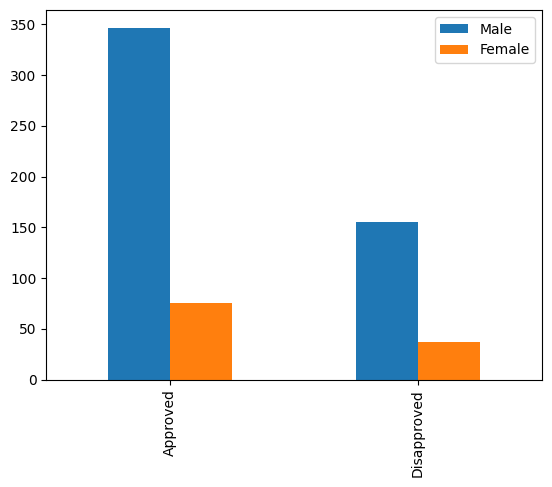

In [7]:
def bar_chart(col):
    Approved = data[data["Loan_Status"]=="Y"][col].value_counts()
    Disapproved = data[data["Loan_Status"]=="N"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")
bar_chart("Gender")

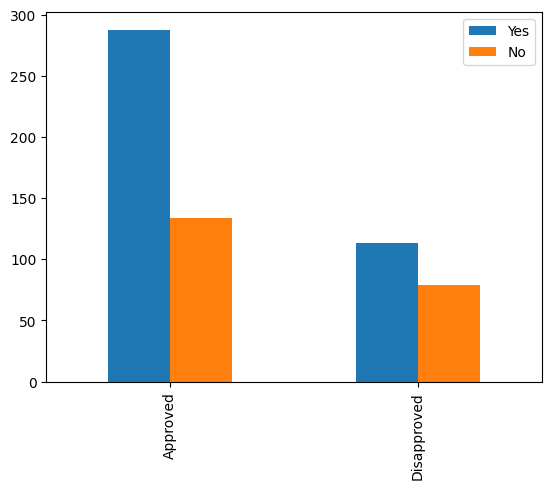

In [8]:
bar_chart("Married")

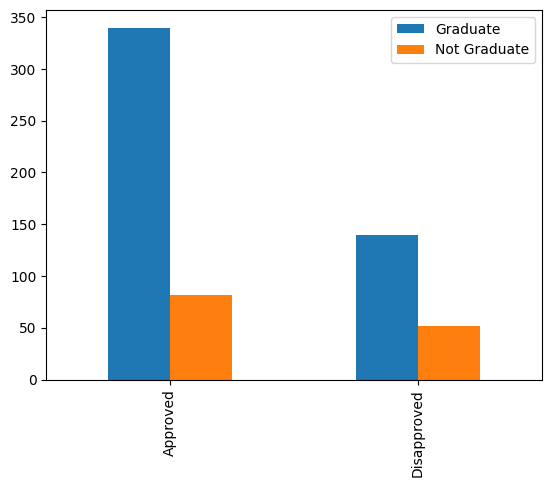

In [9]:
bar_chart("Education")

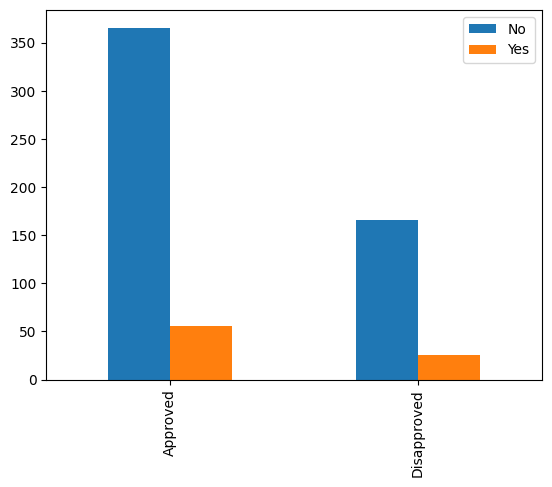

In [10]:
bar_chart("Self_Employed")

In [11]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']])
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [12]:
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']]).astype('int')
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,1


##Spliting the dependent and independent variables

In [14]:
y = data['Loan_Status']
X = data.drop('Loan_Status', axis=1)



# Training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
model = GaussianNB()
model.fit(X_train, y_train)
GaussianNB()
predictions = model.predict(X_test)
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred):
    precision=  precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(precision)
    print(recall)
    print(accuracy)
loss(y_test, predictions)

0.7789473684210526
0.9135802469135802
0.7723577235772358
